In [50]:
#Importing libraries

import pandas as pd
!pip install tabulate
from tabulate import tabulate
%pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\denis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\denis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
#Importing Economic Data
EconomicData = pd.read_csv("C:/Users/denis/OneDrive/VSCode/Git/culminating-project-group-2/WEEK 3/Indicators/Economic_Indicators.csv")

EconomicData.head()

,Country Name,Country Code,Time,Time Code,Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG],Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Current account balance (% of GDP) [BN.CAB.XOKA.GD.ZS],"Current account balance (BoP, current US$) [BN.CAB.XOKA.CD]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],...,Net official aid received (current US$) [DT.ODA.OATL.CD],Net official development assistance and official aid received (constant 2021 US$) [DT.ODA.ALLD.KD],"Net trade in goods (BoP, current US$) [BN.GSR.MRCH.CD]","Net trade in goods and services (BoP, current US$) [BN.GSR.GNFS.CD]","Portfolio investment, bonds (PPG + PNG) (NFL, current US$) [DT.NFL.BOND.CD]","Portfolio investment, net (BoP, current US$) [BN.KLT.PTXL.CD]","Service exports (BoP, current US$) [BX.GSR.NFSV.CD]","Service imports (BoP, current US$) [BM.GSR.NFSV.CD]",Taxes less subsidies on products (constant LCU) [NY.TAX.NIND.KN],"Travel services (% of service exports, BoP) [BX.GSR.TRVL.ZS]"
0,Afghanistan,AFG,2021.0,YR2021,-19.50573346,..,13621070039,..,..,14.3421528,...,..,4690520020,..,..,..,..,..,..,50645000000,..
1,Afghanistan,AFG,2022.0,YR2022,..,..,..,..,..,18.3800424,...,..,3959649902,..,..,..,..,..,..,49146000000,..
2,Afghanistan,AFG,2023.0,YR2023,..,..,..,..,..,16.77513628,...,..,..,..,..,..,..,..,..,54739405100,..
3,Albania,ALB,2021.0,YR2021,11.05709518,11130019640,14797555219,-7.595907592,-1369694859,31.13302001,...,..,633419982.9,-4513572352,-2392168078,549312000,-92646610.22,4117323974,1995919701,2.09705E+11,54.81856723
4,Albania,ALB,2022.0,YR2022,..,..,..,-5.872436401,-1116775476,37.19708481,...,..,338769989,-4466603020,-1959879935,..,601028649.5,5019488987,2512777696,2.15861E+11,58.91190938


In [52]:
#Identifying data types and missing values in one table
#Get the data types
dtypes = EconomicData.dtypes

#Determining the number of missing values in each column
missingValues = EconomicData.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({
    'Variable Name': dtypes.index,
    'Data Type': dtypes.values,
    'Missing Values': missingValues.values})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))
print(table)

+------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                        Variable Name | Data Type | Missing Values |
+------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                         Country Name |    object |              3 |
|                                                                                         Country Code |    object |              5 |
|                                                                                                 Time |   float64 |              5 |
|                                                                                            Time Code |    object |              5 |
|                                   Adjusted net national inco

In [53]:
#Determining the number of unique items in Country Name column
uniqueCount = EconomicData['Country Name'].nunique()
print(f'Unique items in Country Name column: {uniqueCount}')

Unique items in Country Name column: 268


In [54]:
#removing countries that are not part of prechosen 106 countries
specifiedCountries = ['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria', 
                      'Bangladesh', 'Barbados', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 
                      'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 
                      'Congo, Dem. Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 
                      'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 
                      'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kosovo',
                      'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
                      'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 
                      'North Macedonia', 'Norway', 'Pakistan', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
                      'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 
                      'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka', 'St. Lucia', 'Suriname', 'Sweden', 'Switzerland', 'Tajikistan', 
                      'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Turkiye', 'Uganda', 'United Kingdom', 'United States', 'Uruguay']

# Filter the data to include only the specified countries
EconomicData106 = EconomicData[EconomicData['Country Name'].isin(specifiedCountries)]


In [55]:
#Displaying the count of unique items in the 'Country Name' column
print(f'Unique items in Country Name column: {EconomicData106["Country Name"].nunique()}')   

Unique items in Country Name column: 106


In [56]:
#identifying data types and missing values in one table
#Get the data types
dtypes = EconomicData106.dtypes

# Get the number of missing values
missingValues = EconomicData106.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({
    'Column': dtypes.index,
    'DataType': dtypes.values,
    'MissingValues': missingValues.values
})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))

#Display the table
print(table)

+------------------------------------------------------------------------------------------------------+----------+---------------+
|                                                                                               Column | DataType | MissingValues |
+------------------------------------------------------------------------------------------------------+----------+---------------+
|                                                                                         Country Name |   object |             0 |
|                                                                                         Country Code |   object |             0 |
|                                                                                                 Time |  float64 |             0 |
|                                                                                            Time Code |   object |             0 |
|                                   Adjusted net national income (annual % g

In [57]:
#Testing column naming convention change on one variable
EconomicData106.rename(columns={
    'Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]': 'Adjusted Net National Income(Yrly % Growth)'
    }, inplace=True)

C:\Users\denis\AppData\Local\Temp\ipykernel_3596\2307657899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EconomicData106.rename(columns={


In [58]:
#Changing naming conventions of columns for standardization

EconomicData106.rename(columns={
    'Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]': 'Adjusted Net Natiobnal Income (Constant)',
    'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]': 'Adjusted Net National Income (Current)',
    'Current account balance (% of GDP) [BN.CAB.XOKA.GD.ZS]': 'Current Account Balance (% GDP)',
    'Current account balance (BoP, current US$) [BN.CAB.XOKA.CD]': 'Current Account Balance (BoP Current $)',
    'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]': 'Exports Goods and Services (% GDP)',
    'Exports of goods and services (annual % growth) [NE.EXP.GNFS.KD.ZG]' : 'Exports Goods and Services (Yrly % growth)',
    'Exports of goods and services (BoP, current US$) [NE.EXP.GNFS.CD]': 'Exports Goods and Services (BoP Current $)',
    'GDP (current US$) [NY.GDP.MKTP.CD]': 'GDP (Current $)',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'GDP Growth (Yrly %)',
    'GDP per capita (current US$) [NY.GDP.PCAP.CD]': 'GDP per Capita (Current $)',
    'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]': 'GDP per Capita Growth (Yrly %)',
    'GNI (current US$) [NY.GNP.MKTP.CD]': 'GNI (Current $)',
    'GNI growth (annual %) [NY.GNP.MKTP.KD.ZG]': 'GNI Growth (Yrly %)',
    'GNI per capita (current US$) [NY.GNP.PCAP.CD]': 'GNI per Capita (Current $)',
    'GNI per capita growth (annual %) [NY.GNP.PCAP.KD.ZG]': 'GNI per Capita Growth (Yrly %)',
    'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]': 'Gross Capital Formation (% GDP)',
    'Gross capital formation (annual % growth) [NE.GDI.TOTL.KD.ZG]': 'Gross Capital Formation (Yrly % Growth)',
    'Gross capital formation (current US$) [NE.GDI.TOTL.CD]': 'Gross Capital Formation (Current $)',
    'Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]': 'Gross Domestic Savings (% GDP)',
    'Gross domestic savings (current US$) [NY.GDS.TOTL.CD]': 'Gross Domestic Savings (Current $)',
    'Gross national savings (% of GDP) [NY.GNS.ICTR.ZS]': 'Gross National Savings (% GDP)',
    'Gross national savings (current US$) [NY.GNS.ICTR.CD]': 'Gross National Savings (Current $)',
    'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]': 'Imports Goods and Services (% GDP)',
    'Imports of goods and services (annual % growth) [NE.IMP.GNFS.KD.ZG]': 'Imports Goods and Services (Yrly % Growth)',
    'Imports of goods and services (BoP, current US$) [NE.IMP.GNFS.CD]': 'Imports Goods and Services (BoP Current $)',
    'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]': 'Inflation, Consumer Prices (Yrly %)',
    'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]': 'Inflation, GDP Deflator (Yrly %)',
    'Net current transfers from abroad (current US$) [NY.TRF.NCTR.CD]': 'Net Current Transfers from Abroad (Current $)',
    'Net migration [SM.POP.NETM]': 'Net Migration',
    'Net official development assistance and official aid received (current US$) [DT.ODA.ODAT.CD]': 'Net Dvlpmt Assistance and  Aid Received (Current $)',
    'Net primary income (BoP, current US$) [BN.GSR.MRCH.CD]': 'Net Primary Income (BoP Current $)',
    'Net secondary income (BoP, current US$) [BN.GSR.FCTY.CD]': 'Net Secondary Income (BoP Current $)',
    'Personal remittances, received (current US$) [BX.TRF.PWKR.CD.DT]': 'Personal Remittances Received (Current $)',
    'Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]': 'Total Reserves (Includes Gold Current $)',
    'Total reserves minus gold (current US$) [FI.RES.XGLD.CD]': 'Total Reserves Minus Gold (Current $)',
    'Trade (% of GDP) [NE.TRD.GNFS.ZS]': 'Trade (% GDP)',
    'Trade in services (% of GDP) [BG.GSR.NFSV.GD.ZS]': 'Trade in Services (% GDP)',
    'Trade in services (BoP, current US$) [BG.GSR.NFSV.CD]': 'Trade in Services (BoP Current $)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]': 'Unemployment (% Total Labor Force)',
    'Unemployment, total (modeled ILO estimate) [SL.UEM.TOTL.NE.ZS]': 'Unemployment (Total)',
    'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]': 'Urban Population (% Total Population)',
    'Urban population growth (annual %) [SP.URB.GROW]': 'Urban Population Growth (Yrly %)',
    'Urban population living in areas where elevation is below 5 meters (% of total population) [EN.POP.EL5M.UR.ZS]': 'Urban Population Living Below 5 Meters (% Total Population)',
    'Urban population living in slums (% of urban population) [EN.POP.SLUM.UR.ZS]': 'Urban Population Living in Slums (% Urban Population)',
    'Urban population living in slums, proportion urban (%) [EN.POP.SLUM.UR.ZS]': 'Urban Population Living in Slums, Proportion Urban (%)'
}, inplace=True)

C:\Users\denis\AppData\Local\Temp\ipykernel_3596\227912519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EconomicData106.rename(columns={


In [59]:
# changing the naming convention of columns for Standardization

EconomicData106.rename(columns = {'Net official aid received (current US$) [DT.ODA.OATL.CD]': 'Net Official Aid Received (Current $)',
    'Net official development assistance and official aid received (constant 2021 US$) [DT.ODA.ALLD.KD]': 'Net Dvlpmt Assistance and Aid Received (Constant 2021 $)',
    'Net trade in goods (BoP, current US$) [BN.GSR.MRCH.CD]': 'Net Trade in Goods (Current $)',
    'Net trade in goods and services (BoP, current US$) [BN.GSR.MRCH.CD]': 'Net Trade in Goods and Services (Current $)',
    'Portfolio investment, bonds (PPG + PNG) (NFL, current US$) [DT.NFL.BOND.CD]' : 'Portfolio Investment, Bonds (PPG + PNG) (NFL, Current $)',
    'Portfolio investment, equity (PPG + PNG) (NFL, current US$) [DT.NFL.EQTY.CD]' : 'Portfolio Investment, Equity (PPG + PNG) (NFL, Current $)',
    'Primary income on FDI (current US$) [BN.TRF.PRVT.CD]': 'Primary Income on FDI (Current $)',
    'Primary income payments (BoP, current US$) [BN.GSR.FCTY.CD]': 'Primary Income Payments (Current $)',
    'Primary income receipts (BoP, current US$) [BN.GSR.FCTY.CD]': 'Primary Income Receipts (Current $)',
    'Private capital flows, total (net) (BOP, current US$) [BN.KAC.FNCD.CD]': 'Private Capital Flows, Net Total (BOP, Current $)',
    'Revenue, excluding grants (current LCU) [GC.REV.XGRT.CN]': 'Revenue, Excluding Grants (Current LCU)',
    'Revenue, excluding grants (% of GDP) [GC.REV.XGRT.GD.ZS]': 'Revenue, Excluding Grants (% of GDP)',
    'Revenue, excluding grants (current US$) [GC.REV.XGRT.CN]': 'Revenue, Excluding Grants (Current $)',
    'Portfolio investment, net (BoP, current US$) [BN.KLT.PTXL.CD]': 'Net Portfolio Investment (Current $)',
    'Revenue, excluding grants (current US$) [GC.REV.XGRT.CN]': 'Revenue, Excluding Grants (Current $)',
    'Revenue, excluding grants (% of GDP) [GC.REV.XGRT.GD.ZS]': 'Revenue, Excluding Grants (% of GDP)',
    'Service exports (BoP, current US$) [BX.GSR.NFSV.CD]': 'Service Exports (Current $)',
    'Service imports (BoP, current US$) [BM.GSR.NFSV.CD]': 'Service Imports (Current $)',
    'Services, value added (% of GDP) [NV.SRV.TOTL.ZS]': 'Services, Value Added (% of GDP)',
    'Services, value added (current LCU) [NV.SRV.TOTL.CN]': 'Services, Value Added (Current LCU)',
    'Services, value added (current US$) [NV.SRV.TOTL.CN]': 'Services, Value Added (Current $)',
    'Short-term debt (% of total external debt) [DT.DOD.DSTC.ZS]': 'Short-Term Debt (% of Total External Debt)',
    'Short-term debt (% of total reserves) [DT.DOD.DSTC.ZS]': 'Short-Term Debt (% of Total Reserves)',
    'Taxes less subsidies on products (constant LCU) [NY.TAX.NIND.KN]': 'Taxes Less Subsidies on Products (Constant LCU)',
    'Taxes less subsidies on products (current LCU) [NY.TAX.NIND.CN]': 'Taxes Less Subsidies on Products (Current LCU)',
    'Travel services (% of service exports, BoP) [BX.GSR.TRVL.ZS]': 'Travel Services (% of Service Exports)'

}, inplace=True)

C:\Users\denis\AppData\Local\Temp\ipykernel_3596\169687405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EconomicData106.rename(columns = {'Net official aid received (current US$) [DT.ODA.OATL.CD]': 'Net Official Aid Received (Current $)',


In [60]:
#Chaning the naming convention of columns for Standardization

EconomicData106.rename(columns = {'Exports of goods and services (current US$) [NE.EXP.GNFS.CD]': 'Exports of Goods and Services (Current $)',
'External balance on goods and services (constant LCU) [NE.RSB.GNFS.KN]': 'External Balance on Goods and Services (Constant LCU)',
'Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]': 'Foreign Direct Investment, Net (Current $)',
'Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]': 'Foreign Direct Investment, Net Inflows (% of GDP)',
'Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]': 'Foreign Direct Investment, Net Inflows (Current $)',
'Foreign direct investment, net outflows (% of GDP) [BM.KLT.DINV.WD.GD.ZS]': 'Foreign Direct Investment, Net Outflows (% of GDP)',
'Foreign direct investment, net outflows (BoP, current US$) [BM.KLT.DINV.CD.WD]': 'Foreign Direct Investment, Net Outflows (Current $)',
'Imports of goods and services (current US$) [NE.IMP.GNFS.CD]' : 'Imports of Goods and Services (Current $)',
'Multilateral debt service (% of public and publicly guaranteed debt service) [DT.TDS.MLAT.PG.ZS]' : 'Multilateral Debt Service (% of Public and Publicly Guaranteed Debt Service)', 
'Net financial flows, IBRD (NFL, current US$) [DT.NFL.MIBR.CD]': 'Net Financial Flows, IBRD (NFL, Current $)',
'Net financial flows, IDA (NFL, current US$) [DT.NFL.MIDA.CD]' : 'Net Financial Flows, IDA (NFL, Current $)',
'Net financial flows, IMF concessional (NFL, current US$) [DT.NFL.IMFC.CD]' : 'Net Financial Flows, IMF Concessional (NFL, Current $)',
'Net financial flows, IMF nonconcessional (NFL, current US$) [DT.NFL.IMFN.CD]' : 'Net Financial Flows, IMF Nonconcessional (NFL, Current $)',
'Net financial flows, multilateral (NFL, current US$) [DT.NFL.MLAT.CD]' : 'Net Financial Flows, Multilateral (NFL, Current $)',
'Net ODA received (% of central government expense) [DT.ODA.ODAT.XP.ZS]' : 'Net ODA Received (% of Central Government Expense)',    
'Net ODA received (% of GNI) [DT.ODA.ODAT.GN.ZS]' : 'Net ODA Received (% of GNI)',
'Net trade in goods and services (BoP, current US$) [BN.GSR.GNFS.CD]' : 'Net Trade in Goods and Services (Current $)'

}, inplace=True)

C:\Users\denis\AppData\Local\Temp\ipykernel_3596\2624279824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EconomicData106.rename(columns = {'Exports of goods and services (current US$) [NE.EXP.GNFS.CD]': 'Exports of Goods and Services (Current $)',


In [61]:
#Changing the naming convention of columns for Standardization

EconomicData106.rename(columns = {'Gross domestic savings (current LCU) [NY.GDS.TOTL.CN]' : 'Gross Domestic Savings (Current LCU)',
'Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS]' : 'Gross National Expenditure (% of GDP)',
'Gross national expenditure deflator (base year varies by country) [NE.DAB.DEFL.ZS]' : 'Gross National Expenditure Deflator (Base Yr Varies by Country)',
'Gross value added at basic prices (GVA) (constant 2015 US$) [NY.GDP.FCST.KD]' : 'Gross Value Added at Basic Prices (GVA) (Constant 2015 $)',
'Households and NPISHs final consumption expenditure (% of GDP) [NE.CON.PRVT.ZS]' : 'Households and NPISHs Final Consumption Expenditure (% of GDP)',
'Households and NPISHs Final consumption expenditure (annual % growth) [NE.CON.PRVT.KD.ZG]' : 'Households and NPISHs Final Consumption Expenditure (Annual % Growth)',
'Households and NPISHs final consumption expenditure: linked series (current LCU) [NE.CON.PRVT.CN.AD]' : 'Households and NPISHs Final Consumption Expenditure (Current LCU)',
'GDP per capita, PPP (constant 2021 international $) [NY.GDP.PCAP.PP.KD]' : 'GDP per capita, PPP (Constant 2021 International $)',
'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'GDP per capita, PPP (Current International $)',
'GDP, PPP (constant 2021 international $) [NY.GDP.MKTP.PP.KD]' : 'GDP, PPP (Constant 2021 International $)',
'GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]' : 'GDP, PPP (Current International $)',
'GDP: linked series (current LCU) [NY.GDP.MKTP.CN.AD]' : 'GDP: Linked Series (Current LCU)',
'General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]' : 'General Government Final Consumption Expenditure (% of GDP)',
'General government final consumption expenditure (annual % growth) [NE.CON.GOVT.KD.ZG]' : 'General Government Final Consumption Expenditure (Annual % Growth)',
'General government final consumption expenditure (current US$) [NE.CON.GOVT.CD]' : 'General Government Final Consumption Expenditure (Current $)',
'Goods exports (BoP, current US$) [BX.GSR.MRCH.CD]' : 'Goods Exports (Current $)',
'Goods imports (BoP, current US$) [BM.GSR.MRCH.CD]' : 'Goods Imports (Current $)',
'Grants, excluding technical cooperation (BoP, current US$) [BX.GRT.EXTA.CD.WD]' : 'Grants, Excluding Technical Cooperation (Current $)',
'GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]' : 'GDP per capita (Constant 2015 $)',
'GDP per capita (constant LCU) [NY.GDP.PCAP.KN]' : 'GDP per capita (Constant LCU)',
'GDP per capita (current LCU) [NY.GDP.PCAP.CN]' : 'GDP per capita (Current LCU)',
'GDP (constant 2015 US$) [NY.GDP.MKTP.KD]' : 'GDP (Constant 2015 $)',
'GDP (constant LCU) [NY.GDP.MKTP.KN]' : 'GDP (Constant LCU)',
'GDP (current LCU) [NY.GDP.MKTP.CN]' : 'GDP (Current LCU)',

}, inplace=True)

C:\Users\denis\AppData\Local\Temp\ipykernel_3596\1170662908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EconomicData106.rename(columns = {'Gross domestic savings (current LCU) [NY.GDS.TOTL.CN]' : 'Gross Domestic Savings (Current LCU)',


In [62]:
#Exploratory Data Analysis
EconomicData106.describe()

,Time
count,318.000000
mean,2022.000000
std,0.817783
min,2021.000000
25%,2021.000000
50%,2022.000000
75%,2023.000000
max,2023.000000


In [63]:
# Determining Shape of the DataFrame
EconomicData106.shape

(318, 68)

In [64]:
#Genrating summary statistics for all columns in the dataset
summaryStatistics = EconomicData106.describe(include='all')

# Display the summary statistics
print(summaryStatistics)

       Country Name Country Code         Time Time Code  \
count           318          318   318.000000       318   
unique          106          106          NaN         3   
top         Albania          ALB          NaN    YR2021   
freq              3            3          NaN       106   
mean            NaN          NaN  2022.000000       NaN   
std             NaN          NaN     0.817783       NaN   
min             NaN          NaN  2021.000000       NaN   
25%             NaN          NaN  2021.000000       NaN   
50%             NaN          NaN  2022.000000       NaN   
75%             NaN          NaN  2023.000000       NaN   
max             NaN          NaN  2023.000000       NaN   

       Adjusted Net National Income(Yrly % Growth)  \
count                                          318   
unique                                          93   
top                                             ..   
freq                                           226   
mean                 

In [65]:
# Export EconomicData106 as a CSV file
EconomicData106.to_csv('EconomicData106.csv', index=False)

In [66]:
#creating a list of numeric columns
EconomicColumns = EconomicData106.columns.tolist()
print("Columns in the DataFrame:", EconomicColumns)

Columns in the DataFrame: ['Country Name', 'Country Code', 'Time', 'Time Code', 'Adjusted Net National Income(Yrly % Growth)', 'Adjusted Net Natiobnal Income (Constant)', 'Adjusted Net National Income (Current)', 'Current Account Balance (% GDP)', 'Current Account Balance (BoP Current $)', 'Exports Goods and Services (% GDP)', 'Exports Goods and Services (Yrly % growth)', 'Exports of Goods and Services (Current $)', 'External Balance on Goods and Services (Constant LCU)', 'Foreign Direct Investment, Net (Current $)', 'Foreign Direct Investment, Net Inflows (% of GDP)', 'Foreign Direct Investment, Net Inflows (Current $)', 'Foreign Direct Investment, Net Outflows (% of GDP)', 'Foreign Direct Investment, Net Outflows (Current $)', 'GDP (Constant 2015 $)', 'GDP (Constant LCU)', 'GDP (Current LCU)', 'GDP (Current $)', 'GDP Growth (Yrly %)', 'GDP per capita (Constant 2015 $)', 'GDP per capita (Constant LCU)', 'GDP per capita (Current LCU)', 'GDP per Capita (Current $)', 'GDP per Capita Grow

In [67]:
#drop columns that have more than 70% na values
EconomicData1062 = EconomicData106.dropna(thresh=len(EconomicData106) * 0.95, axis=1)

# Display the list of columns after dropping with a count of variables as a table
EconomicData1062 = EconomicData1062.reset_index(drop=True)
print("Columns in the DataFrame after dropping:", EconomicData1062.columns.tolist())
print("Number of columns after dropping:", len(EconomicData1062.columns.tolist()))

Columns in the DataFrame after dropping: ['Country Name', 'Country Code', 'Time', 'Time Code', 'Adjusted Net National Income(Yrly % Growth)', 'Adjusted Net Natiobnal Income (Constant)', 'Adjusted Net National Income (Current)', 'Current Account Balance (% GDP)', 'Current Account Balance (BoP Current $)', 'Exports Goods and Services (% GDP)', 'Exports Goods and Services (Yrly % growth)', 'Exports of Goods and Services (Current $)', 'External Balance on Goods and Services (Constant LCU)', 'Foreign Direct Investment, Net (Current $)', 'Foreign Direct Investment, Net Inflows (% of GDP)', 'Foreign Direct Investment, Net Inflows (Current $)', 'Foreign Direct Investment, Net Outflows (% of GDP)', 'Foreign Direct Investment, Net Outflows (Current $)', 'GDP (Constant 2015 $)', 'GDP (Constant LCU)', 'GDP (Current LCU)', 'GDP (Current $)', 'GDP Growth (Yrly %)', 'GDP per capita (Constant 2015 $)', 'GDP per capita (Constant LCU)', 'GDP per capita (Current LCU)', 'GDP per Capita (Current $)', 'GDP 

In [68]:
#Creating a new DataFrame for combined information
variableList = EconomicData1062.columns.tolist()
#identifying data types and missing values in one table
#Get the data types
dtypes = EconomicData1062.dtypes

# Get the number of missing values
missingValues = EconomicData1062.isna().sum()

info2 = pd.DataFrame({
    'Column': dtypes.index,
    'DataType': dtypes.values,
    'MissingValues': missingValues.values
})

#Converting DataFrame to table format with right alignment
table = tabulate(info2, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))

#Display the table
print(table)

+------------------------------------------------------------------------------+----------+---------------+
|                                                                       Column | DataType | MissingValues |
+------------------------------------------------------------------------------+----------+---------------+
|                                                                 Country Name |   object |             0 |
|                                                                 Country Code |   object |             0 |
|                                                                         Time |  float64 |             0 |
|                                                                    Time Code |   object |             0 |
|                                  Adjusted Net National Income(Yrly % Growth) |   object |             0 |
|                                     Adjusted Net Natiobnal Income (Constant) |   object |             0 |
|                           

In [69]:
#replace missing values with 0
EconomicData1062.fillna(0, inplace=True)

# Display the first few rows of the DataFrame after replacing missing values
print(EconomicData1062.head())

  Country Name Country Code    Time Time Code  \
0      Albania          ALB  2021.0    YR2021   
1      Albania          ALB  2022.0    YR2022   
2      Albania          ALB  2023.0    YR2023   
3    Argentina          ARG  2021.0    YR2021   
4    Argentina          ARG  2022.0    YR2022   

  Adjusted Net National Income(Yrly % Growth)  \
0                                 11.05709518   
1                                          ..   
2                                          ..   
3                                 12.48955577   
4                                          ..   

  Adjusted Net Natiobnal Income (Constant)  \
0                              11130019640   
1                                       ..   
2                                       ..   
3                              4.88631E+11   
4                                       ..   

  Adjusted Net National Income (Current) Current Account Balance (% GDP)  \
0                            14797555219                 

In [70]:
#Creating a new DataFrame for combined information
variableList = EconomicData1062.columns.tolist()
#identifying data types and missing values in one table
#Get the data types
dtypes = EconomicData1062.dtypes

# Get the number of missing values
missingValues = EconomicData1062.isna().sum()

info2 = pd.DataFrame({
    'Column': dtypes.index,
    'DataType': dtypes.values,
    'MissingValues': missingValues.values
})

#Converting DataFrame to table format with right alignment
table = tabulate(info2, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))

#Display the table
print(table)

+------------------------------------------------------------------------------+----------+---------------+
|                                                                       Column | DataType | MissingValues |
+------------------------------------------------------------------------------+----------+---------------+
|                                                                 Country Name |   object |             0 |
|                                                                 Country Code |   object |             0 |
|                                                                         Time |  float64 |             0 |
|                                                                    Time Code |   object |             0 |
|                                  Adjusted Net National Income(Yrly % Growth) |   object |             0 |
|                                     Adjusted Net Natiobnal Income (Constant) |   object |             0 |
|                           

In [74]:
#changing country name, country code, time code to categorical variables
EconomicData1062['Country Name'] = EconomicData1062['Country Name'].astype('category') 
EconomicData1062['Country Code'] = EconomicData1062['Country Code'].astype('category')
EconomicData1062['Time'] = EconomicData1062['Time'].astype('category')
EconomicData1062['Country Name'] = EconomicData1062['Country Name'].cat.codes
EconomicData1062['Country Code'] = EconomicData1062['Country Code'].cat.codes
EconomicData1062['Time'] = EconomicData1062['Time'].cat.codes


In [75]:
#Creating a new DataFrame for combined information
variableList = EconomicData1062.columns.tolist()
#identifying data types and missing values in one table
#Get the data types
dtypes = EconomicData1062.dtypes

# Get the number of missing values
missingValues = EconomicData1062.isna().sum()

info2 = pd.DataFrame({
    'Column': dtypes.index,
    'DataType': dtypes.values,
    'MissingValues': missingValues.values
})

#Converting DataFrame to table format with right alignment
table = tabulate(info2, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))

#Display the table
print(table)

+------------------------------------------------------------------------------+----------+---------------+
|                                                                       Column | DataType | MissingValues |
+------------------------------------------------------------------------------+----------+---------------+
|  |
|  |
|  |
|                                                                    Time Code |   object |             0 |
|                                  Adjusted Net National Income(Yrly % Growth) |   object |             0 |
|                                     Adjusted Net Natiobnal Income (Constant) |   object |             0 |
|                                       Adjusted Net National Income (Current) |   object |             0 |
|                                              Current Account Balance (% GDP) |   object |             0 |
|                                      Current Account Balance (BoP Current $) |   object |             0 |
|         

In [71]:
# Convert only numeric columns to numeric values
numeric_columns = EconomicData1062.select_dtypes(include=['float']).columns
EconomicData1062[numeric_columns] = EconomicData1062[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [76]:
#Creating a new DataFrame for combined information
variableList = EconomicData1062.columns.tolist()
#identifying data types and missing values in one table
#Get the data types
dtypes = EconomicData1062.dtypes

# Get the number of missing values
missingValues = EconomicData1062.isna().sum()

info2 = pd.DataFrame({
    'Column': dtypes.index,
    'DataType': dtypes.values,
    'MissingValues': missingValues.values
})

#Converting DataFrame to table format with right alignment
table = tabulate(info2, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))

#Display the table
print(table)

+------------------------------------------------------------------------------+----------+---------------+
|                                                                       Column | DataType | MissingValues |
+------------------------------------------------------------------------------+----------+---------------+
|  |
|  |
|  |
|                                                                    Time Code |   object |             0 |
|                                  Adjusted Net National Income(Yrly % Growth) |   object |             0 |
|                                     Adjusted Net Natiobnal Income (Constant) |   object |             0 |
|                                       Adjusted Net National Income (Current) |   object |             0 |
|                                              Current Account Balance (% GDP) |   object |             0 |
|                                      Current Account Balance (BoP Current $) |   object |             0 |
|         

In [72]:
#dropping columns that have missing values
EconomicData1062 = EconomicData1062.dropna(thresh=len(EconomicData1062) * 0.95, axis=1)

In [73]:
#list of numeric columns
numeric_columns = NumericDF.columns.tolist()
print("Numeric columns in the DataFrame:", numeric_columns)

NameError: name 'NumericDF' is not defined

In [ ]:
#creating correlation matrix and heatmap
correlation_matrix = NumericDF.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')

SyntaxError: invalid syntax (3284487882.py, line 6)

In [ ]:
# Importing Numpy as np
import numpy as np

# Install scikit-learn
%pip install scikit-learn

from sklearn.preprocessing import StandardScaler

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\denis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(EconomicData1062[numeric_columns])

C:\Users\denis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\denis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\denis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


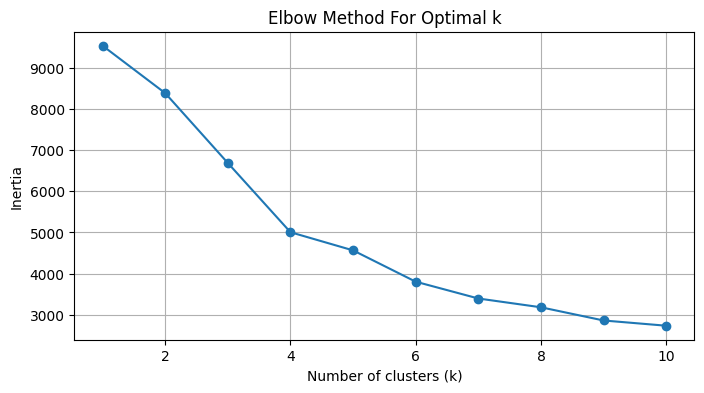

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Ensure there are no NaN values in the dataset
df_scaled_cleaned = np.nan_to_num(df_scaled)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_cleaned)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()